# WeatherPy
----

#### General Observable Trends

There are several observable trends when looking at a randomly selected group of over 500 cities worldwide and comparing their weather conditions. We can draw multiple conclusions on how the weather changes in cities as we approach the equator. 

The first observable trend is shown in the first scatterplot of city latitude versus maximum temperature of each city. From the pattern of the graph, it appears several cities located close to the equator have higher maximum temperatures than cities located further away from the equator. 

A similar trend can be observed when looking at the linear regression graph, for the northern hemisphere of city latitude versus maximum temperature of each city. The trend of the graph, and the correlation coefficient, indicate there’s a strong negative correlation between the two variables, meaning the further north of the equator the city is, the lower the maximum temperature is in the northern hemisphere. In the linear regression graph for the southern hemisphere of city latitude versus maximum temperature of each city, the trend of the graph and the correlation coefficient indicate there is a strong positive correlation between the two variables. This means the closer a city is located to the equator, the higher the maximum temperature is in the southern hemisphere. Overall, we can conclude that the closer a city is to the equator the warmer the temperature is.

In regards to city location (latitude) and the percentage of humidity in each city, it’s clear there is no correlation between the two variables. This is clear in the scatterplot, both linear regression graphs, and both correlation coefficients for the northern and southern hemispheres. It's safe to say the latitude of a city does not necessarily correlate to the city's humidity. 

In regards to city location (latitude) and the percentage of cloudiness in each city, it’s clear there is no correlation between the two variables. This is clear in the scatterplot, both linear regression graphs, and both correlation coefficients for the northern and southern hemispheres. It's safe to say the latitude of a city does not necessarily correlate to the city's cloudiness. 

In regards to city location (latitude) and the wind speed in each city, it’s clear there is no correlation between the two variables. This is clear in the scatterplot, both linear regression graphs, and both correlation coefficients for the northern and southern hemispheres. It's safe to say the latitude of a city does not necessarily correlate to the city's wind speed. 

## Dependencies and Setup

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

#Import API key
from api_keys import weather_api_key

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [28]:
#Open Weather Map API URL and query URL
w_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = w_url + 'appid=' + weather_api_key + '&q=' 

#Counters for count and batch; new city weather list
count = 1
batch = 1
city_weather = []

#Loop through cities
for i, c in enumerate(cities):
    
    #Try: finding city, adding appropriate values to city_dict
    try:
        response = requests.get(query_url + c + str('&units=imperial')).json()
        
        print(f'Processing Record {count} of Set {batch} | {c}') 
        city_dict = {'City': response['name'],
                     'Lat': response['coord']['lat'],
                     'Lng': response['coord']['lon'],
                     'Max Temp (F)': response['main']['temp_max'],
                     'Humidity (%)': response['main']['humidity'],
                     'Cloudiness (%)': response['clouds']['all'],
                     'Wind Speed (mph)': response['wind']['speed'],
                     'Country': response['sys']['country'],
                     'Date': response['dt']}
        
        city_weather.append(city_dict)
    
    #Except: if city info is not found
    except:
        print(f'City, {c}, not found. Skipping...')    
   
    #Increase count, increase batch once batch hits 51 and reset count to 1
    count += 1

    if count == 51:
        batch +=1
        count = 1


Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | jauja
Processing Record 3 of Set 1 | gilgit
Processing Record 4 of Set 1 | amderma
City, amderma, not found. Skipping...
Processing Record 5 of Set 1 | cayenne
Processing Record 6 of Set 1 | yaan
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | aklavik
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | tsihombe
City, tsihombe, not found. Skipping...
Processing Record 11 of Set 1 | kieta
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | boddam
Processing Record 14 of Set 1 | najran
Processing Record 15 of Set 1 | bosaso
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | taolanaro
City, taolanaro, not found. Skipping...
Processing Record 19 of Set 1 | saleaula
City, saleaula, not found. Skipping...
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | new nor

Processing Record 34 of Set 4 | fort walton beach
Processing Record 35 of Set 4 | algiers
Processing Record 36 of Set 4 | saskylakh
Processing Record 37 of Set 4 | mishkino
Processing Record 38 of Set 4 | kutum
Processing Record 39 of Set 4 | hirara
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | quatre cocos
Processing Record 42 of Set 4 | hohhot
Processing Record 43 of Set 4 | zapolyarnyy
Processing Record 44 of Set 4 | sakyla
Processing Record 45 of Set 4 | caucaia
Processing Record 46 of Set 4 | umzimvubu
City, umzimvubu, not found. Skipping...
Processing Record 47 of Set 4 | srednekolymsk
Processing Record 48 of Set 4 | georgetown
Processing Record 49 of Set 4 | mareeba
Processing Record 50 of Set 4 | artvin
Processing Record 1 of Set 5 | illoqqortoormiut
City, illoqqortoormiut, not found. Skipping...
Processing Record 2 of Set 5 | nizhneyansk
City, nizhneyansk, not found. Skipping...
Processing Record 3 of Set 5 | vernon
Processing Record 4 of Set 5 | boy

Processing Record 20 of Set 8 | sentyabrskiy
City, sentyabrskiy, not found. Skipping...
Processing Record 21 of Set 8 | novikovo
Processing Record 22 of Set 8 | tuatapere
Processing Record 23 of Set 8 | yulara
Processing Record 24 of Set 8 | ayer itam
City, ayer itam, not found. Skipping...
Processing Record 25 of Set 8 | cururupu
Processing Record 26 of Set 8 | smithers
Processing Record 27 of Set 8 | masunga
Processing Record 28 of Set 8 | mogadishu
Processing Record 29 of Set 8 | sabha
Processing Record 30 of Set 8 | taree
Processing Record 31 of Set 8 | te anau
Processing Record 32 of Set 8 | nishihara
Processing Record 33 of Set 8 | ostersund
Processing Record 34 of Set 8 | mahebourg
Processing Record 35 of Set 8 | huilong
Processing Record 36 of Set 8 | barra
Processing Record 37 of Set 8 | yuncheng
Processing Record 38 of Set 8 | toamasina
Processing Record 39 of Set 8 | charters towers
Processing Record 40 of Set 8 | tumannyy
City, tumannyy, not found. Skipping...
Processing Re

Processing Record 6 of Set 12 | saint-joseph
Processing Record 7 of Set 12 | hambantota
Processing Record 8 of Set 12 | penzance
Processing Record 9 of Set 12 | aqtobe
Processing Record 10 of Set 12 | darhan
Processing Record 11 of Set 12 | kaka
Processing Record 12 of Set 12 | agua buena
Processing Record 13 of Set 12 | vilyuysk
Processing Record 14 of Set 12 | pangnirtung
Processing Record 15 of Set 12 | bad wildbad
Processing Record 16 of Set 12 | meulaboh
Processing Record 17 of Set 12 | nakamura
Processing Record 18 of Set 12 | gemona
Processing Record 19 of Set 12 | oromocto
Processing Record 20 of Set 12 | saint-denis
Processing Record 21 of Set 12 | powassan
Processing Record 22 of Set 12 | lukulu
Processing Record 23 of Set 12 | thunder bay
Processing Record 24 of Set 12 | nargana
Processing Record 25 of Set 12 | zyryanka
Processing Record 26 of Set 12 | puerto ayacucho
Processing Record 27 of Set 12 | tocache
Processing Record 28 of Set 12 | pitimbu
Processing Record 29 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
#Create dataframe from above dictionary for the weather of the cities
weather_df = pd.DataFrame(city_weather)

#Format the date
weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit = 's')
weather_df['Date'] = weather_df['Date'].dt.strftime('%m/%d/%Y')

#Output the data to a .csv
weather_df.to_csv(output_data_file)
weather_df

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Punta Arenas,-53.15,-70.92,32.00,95,7,2.24,CL,07/16/2020
1,Jauja,-11.78,-75.50,46.78,71,69,3.74,PE,07/16/2020
2,Gilgit,35.92,74.31,79.83,31,79,3.20,PK,07/16/2020
3,Cayenne,4.93,-52.33,77.00,100,20,9.10,GF,07/16/2020
4,Yaan,7.38,8.57,71.08,98,100,6.98,NG,07/16/2020
...,...,...,...,...,...,...,...,...,...
561,Soyo,-6.13,12.37,70.75,91,57,6.89,AO,07/16/2020
562,Skibbereen,51.55,-9.27,57.20,93,40,9.17,IE,07/16/2020
563,Mitrópoli,39.34,21.84,53.01,62,5,11.01,GR,07/16/2020
564,Mudgee,-32.59,149.59,55.40,47,0,10.29,AU,07/16/2020


In [32]:
#Dataframe count
weather_df.count()

City                566
Lat                 566
Lng                 566
Max Temp (F)        566
Humidity (%)        566
Cloudiness (%)      566
Wind Speed (mph)    566
Country             566
Date                566
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#Summary statistics of dataframe
weather_df.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,18.809777,21.473643,68.458587,71.405204,51.009294,7.575483
std,33.835475,89.100878,13.919930,18.964422,38.851984,5.170012
min,-54.800000,-175.200000,26.600000,1.000000,0.000000,0.090000
25%,-8.130000,-58.165000,58.460000,62.000000,7.250000,3.740000
50%,19.855000,26.430000,70.340000,75.000000,53.500000,6.700000
75%,47.462500,100.425000,80.010000,85.000000,90.000000,9.855000
max,78.220000,179.320000,100.400000,100.000000,100.000000,32.060000


In [7]:
#Make a new DataFrame equal to the city data to drop all humidity outliers by index.
city_data = weather_df
city_data

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Novy Urengoy,66.08,76.63,50.77,78,100,25.21,RU,07/16/2020
1,Ribeira Grande,38.52,-28.70,68.68,80,89,4.32,PT,07/16/2020
2,Ponta Delgada,37.73,-25.67,68.00,72,75,8.05,PT,07/16/2020
3,Rikitea,-23.12,-134.97,74.07,87,100,6.85,PF,07/16/2020
4,Voyvozh,62.89,54.96,55.18,96,100,7.85,RU,07/16/2020
...,...,...,...,...,...,...,...,...,...
533,Aleksandrovskiy Zavod,50.92,117.94,79.74,57,98,6.71,RU,07/16/2020
534,Gaza,31.50,34.47,73.99,70,2,3.00,PS,07/16/2020
535,Port Blair,11.67,92.75,81.05,80,100,8.30,IN,07/16/2020
536,Vozhega,60.47,40.22,56.21,98,95,8.39,RU,07/16/2020


In [8]:
#Get the indices of cities that have humidity over 100%.
humidityindex = city_data[city_data['Humidity (%)']>100].index
humidityindex

Int64Index([], dtype='int64')

In [9]:
#Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Extract relevant fields from the data frame
clean_city_data = city_data.drop(humidityindex, inplace=False)                                      
clean_city_data

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Novy Urengoy,66.08,76.63,50.77,78,100,25.21,RU,07/16/2020
1,Ribeira Grande,38.52,-28.70,68.68,80,89,4.32,PT,07/16/2020
2,Ponta Delgada,37.73,-25.67,68.00,72,75,8.05,PT,07/16/2020
3,Rikitea,-23.12,-134.97,74.07,87,100,6.85,PF,07/16/2020
4,Voyvozh,62.89,54.96,55.18,96,100,7.85,RU,07/16/2020
...,...,...,...,...,...,...,...,...,...
533,Aleksandrovskiy Zavod,50.92,117.94,79.74,57,98,6.71,RU,07/16/2020
534,Gaza,31.50,34.47,73.99,70,2,3.00,PS,07/16/2020
535,Port Blair,11.67,92.75,81.05,80,100,8.30,IN,07/16/2020
536,Vozhega,60.47,40.22,56.21,98,95,8.39,RU,07/16/2020


In [10]:
#Export the City_Data into a csv
clean_city_data.to_csv('output_data/CleanCityData.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
#Function for creating scatterplots
def temp(y, x=(clean_city_data['Lat'])):
    plt.scatter(x,y, marker = 'o', edgecolor = 'black', facecolor = 'purple')
    plt.xlabel(x.name + 'itude')
    plt.ylabel(y.name)
    plt.title('City ' + x.name + 'itude vs. ' + y.name + ' - (' + clean_city_data['Date'][0] + ')')
    plt.grid()
    plt.savefig('output_data/' + x.name + y.name + '.png') #Saving images

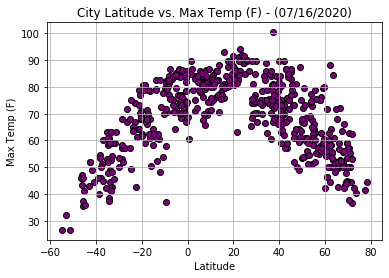

In [12]:
#Latitude vs. Max Temp Plot
temp(clean_city_data['Max Temp (F)'])

The above scatterplot is an analysis of latitude of over 500 randomly selected cities versus the maximum temperature of each city. From the shape of this graph, it appears several cities located close to the equator have higher maximum temperatures than cities located further away from the equator. 

## Latitude vs. Humidity Plot

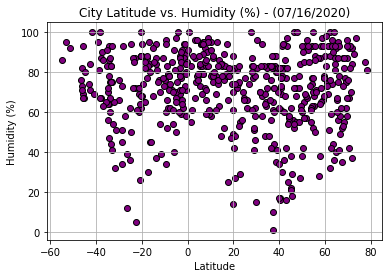

In [13]:
#Latitude vs. Humidity Plot
temp(clean_city_data['Humidity (%)'])

The above scatterplot is an analysis of latitude of over 500 randomly selected cities versus the percentage of humidity in each city. After observing this graph, there does not appear to be a relationship between the location of a city and the city's humidity. 

## Latitude vs. Cloudiness Plot

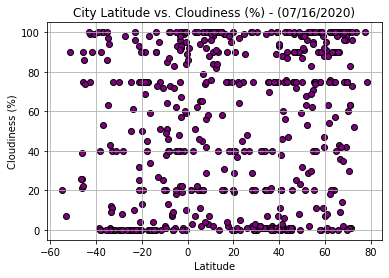

In [14]:
#Latitude vs. Cloudiness Plot
temp(clean_city_data['Cloudiness (%)'])

The above scatterplot is an analysis of latitude of over 500 randomly selected cities versus the percentage of cloudiness of each city. After observing this graph, there does not appear to be a relationship between the location of a city and the city's cloudiness.

## Latitude vs. Wind Speed Plot

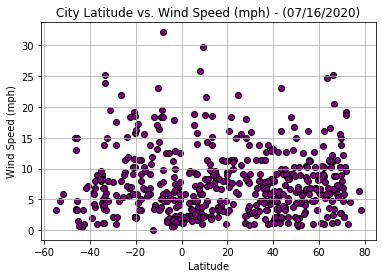

In [15]:
#Latitude vs. Wind Speed Plot
temp(clean_city_data['Wind Speed (mph)'])

The above scatterplot is an analysis of latitude of over 500 randomly selected cities versus the wind speed of each city. After observing this graph, there does not appear to be a relationship between the location of a city and the city's wind speed.

## Linear Regression

In [16]:
#Function to create Linear Regression plots
def lin_reg(y, x=clean_city_data['Lat']):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_values,"r-")
    plt.annotate(line_eq,params,fontsize=15,color='red')
    plt.xlabel(x.name + 'itude')
    plt.ylabel(y.name)
    plt.title('City ' + x.name + 'itude vs. ' + y.name + ' - (' + clean_city_data['Date'][0] + ')')
    print(f'The correlation coefficient, r, is: {rvalue}') #Printing the r value
    print(f'And r-squared is: {rvalue**2}')


In [17]:
#Create Northern and Southern Hemisphere DataFrames
north_df = clean_city_data.loc[clean_city_data['Lat']>=0, :]
#print(north_df.count()) #Total points in plots below
south_df = clean_city_data.loc[clean_city_data['Lat']<0, :]
#print(south_df.count()) #Total points in plots below

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient, r, is: -0.7237695658210146
And r-squared is: 0.52384238440874


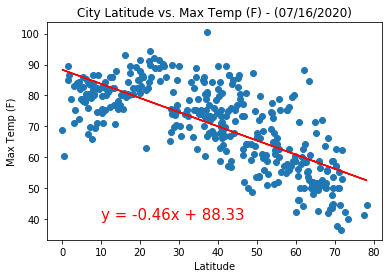

In [18]:
#Latitude vs. Max Temp Linear Regression - Northern Hemisphere
params = (10,40)
lin_reg(north_df['Max Temp (F)'], x = north_df['Lat'])
plt.savefig('output_data/NorthLatTempLinReg.png')

The above linear regression graph is an analysis of latitude of randomly selected cities in the northern hemisphere versus the maximum temperature of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there is a strong negative correlation between the two variables. It's safe to say the further north of the equator the city is, the colder the maximum temperature is in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient, r, is: 0.8187156537437517
And r-squared is: 0.6702953216850587


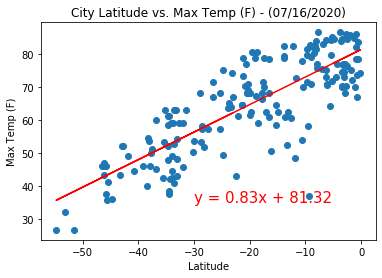

In [19]:
#Latitude vs. Max Temp Linear Regression - Southern hemisphere
params = (-30,35)
lin_reg(south_df['Max Temp (F)'], x = south_df['Lat'])
plt.savefig('output_data/SouthLatTempLinReg.png')

The above linear regression graph is an analysis of latitude of randomly selected cities in the southern hemisphere versus the maximum temperature of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there is a strong positive correlation between the two variables. It's safe to say the closer a city is located to the equator, the hotter the maximum temperature is in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient, r, is: -0.07207092886112713
And r-squared is: 0.005194218786905648


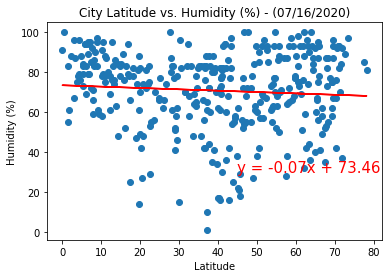

In [20]:
#Latitude vs. Humidity Linear Regression - Northern Hemisphere
params = (45,30)
lin_reg(north_df['Humidity (%)'], x = north_df['Lat'])
plt.savefig('output_data/NorthLatHumLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the northern hemisphere versus the humidity of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's humidity in the northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient, r, is: 0.014985419655432246
And r-squared is: 0.0002245628022494151


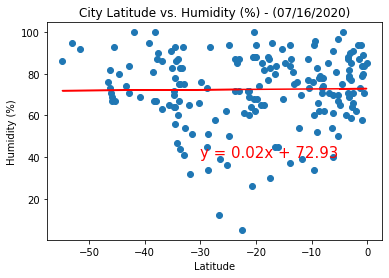

In [21]:
#Latitude vs. Humidity Linear Regression - Southern Hemisphere
params = (-30,40)
lin_reg(south_df['Humidity (%)'], x = south_df['Lat'])
plt.savefig('output_data/SouthLatHumLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the southern hemisphere versus the humidity of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's humidity in the southern hemisphere. (Similar as the previous northern hemisphere graph of latitude versus maximum temperature).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient, r, is: 0.11158558794282795
And r-squared is: 0.01245134343654659


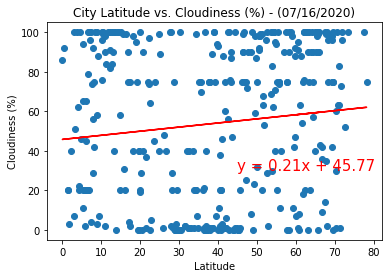

In [22]:
#Latitude vs Cloudiness Linear Regression - Northern Hemisphere
params = (45,30)
lin_reg(north_df['Cloudiness (%)'], x = north_df['Lat'])
plt.savefig('output_data/NorthLatCloudLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the northern hemisphere versus the cloudiness of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient, r, is: 0.12332306217152265
And r-squared is: 0.015208577663361242


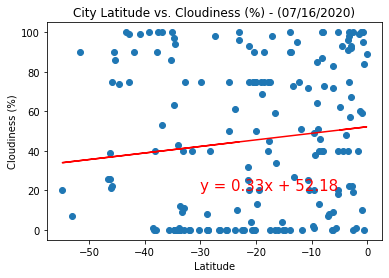

In [23]:
#Latitude vs Cloudiness Linear Regression - Southern Hemisphere
params = (-30,20)
lin_reg(south_df['Cloudiness (%)'], x = south_df['Lat'])
plt.savefig('output_data/SouthLatCloudLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the southern hemisphere versus the cloudiness of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's cloudiness in the southern hemisphere. (Similar to the previous northern hemisphere graph of latitude versus cloudiness).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient, r, is: 0.03867489828437298
And r-squared is: 0.0014957477573065963


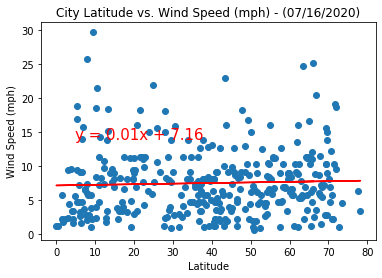

In [24]:
#Latitude vs Wind Speed Linear Regression - Northern Hemisphere
params = (5,14)
lin_reg(north_df['Wind Speed (mph)'], x = north_df['Lat'])
plt.savefig('output_data/NorthLatWindLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the northern hemisphere versus the wind speed of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's wind speed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient, r, is: 0.018046869506652706
And r-squared is: 0.0003256894989901513


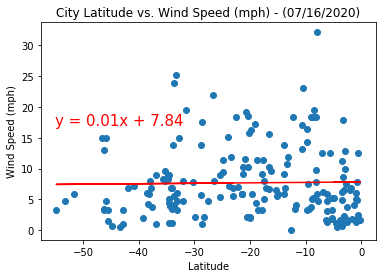

In [25]:
#Latitude vs Wind Speed Linear Regression - Southern Hemisphere
params = (-55,17)
lin_reg(south_df['Wind Speed (mph)'], x = south_df['Lat'])
plt.savefig('output_data/SouthLatWindLinReg.png')

The above linear regression graph is an analysis of the latitude of randomly selected cities in the southern hemisphere versus the wind speed of each city. Due to the pattern of this graph, and the correlation coefficient, it is evident there's no correlation between the two variables. It's safe to say the latitude of a city does not necessarily correlate to the city's wind speed in the southern hemisphere. (Similar to the previous northern hemisphere graph of latitude versus wind speed).